In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = pd.read_csv('iris.csv')
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
x=iris.iloc[:,:-1]
x

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y=iris.iloc[:,-1:]
y

,Name
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [5]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
iris.Name=labelEncoder.fit_transform(iris.Name)
iris['Name'] = iris['Name'].astype('category')

In [6]:
iris['Name'].value_counts()

2    50
1    50
0    50
Name: Name, dtype: int64

In [7]:
iris.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [8]:
iris['Name'].value_counts()

2    50
1    50
0    50
Name: Name, dtype: int64

In [9]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLength,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidth,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLength,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidth,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [10]:
iris.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024972595C88>,
      dtype=object)

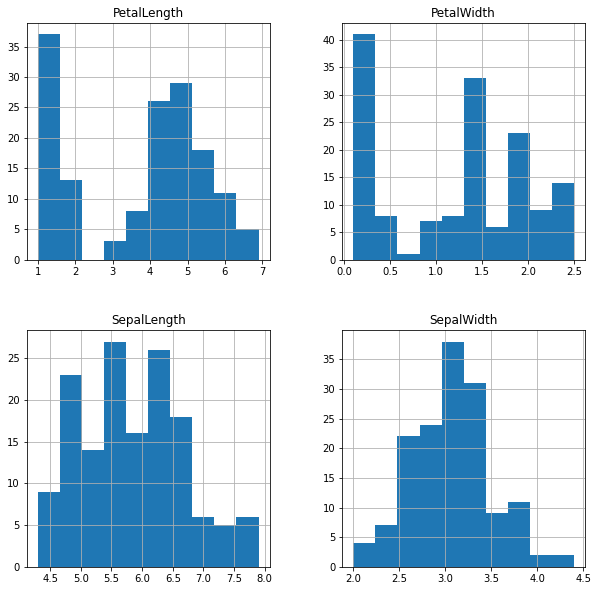

In [11]:
iris.hist(figsize=(10,10))

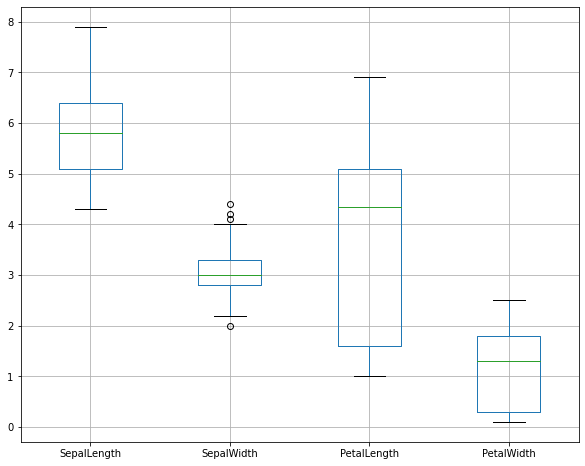

In [12]:
iris.boxplot(figsize=(10,8))

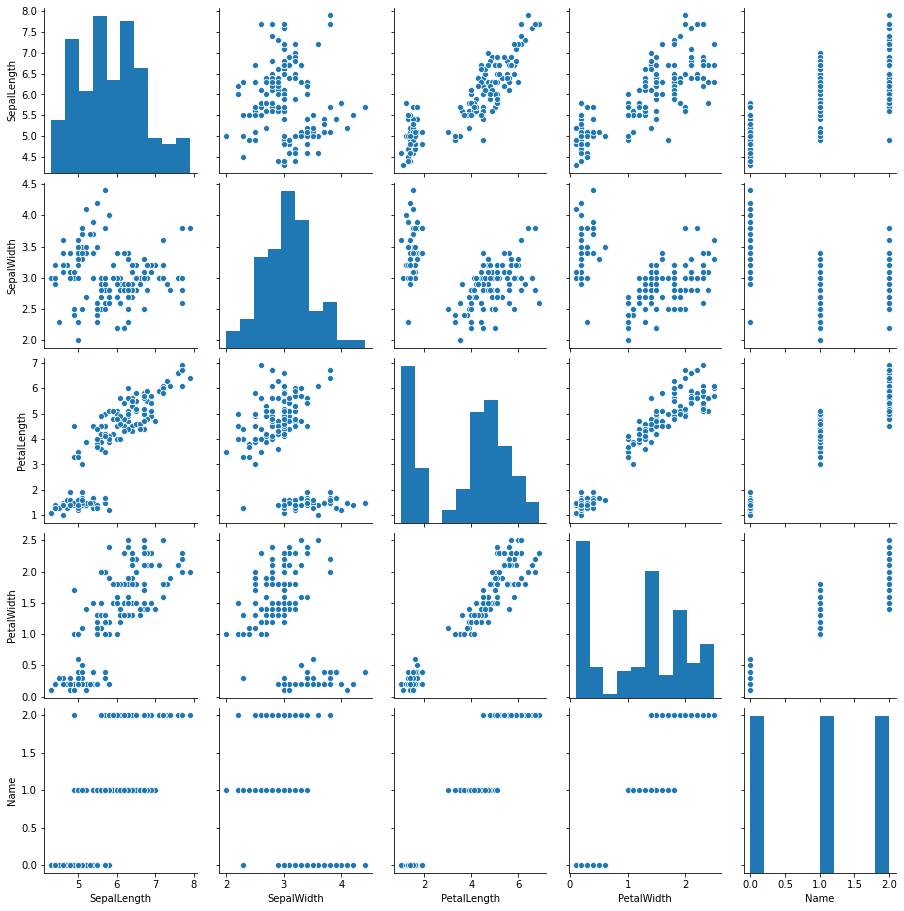

In [13]:
sns.pairplot(iris)

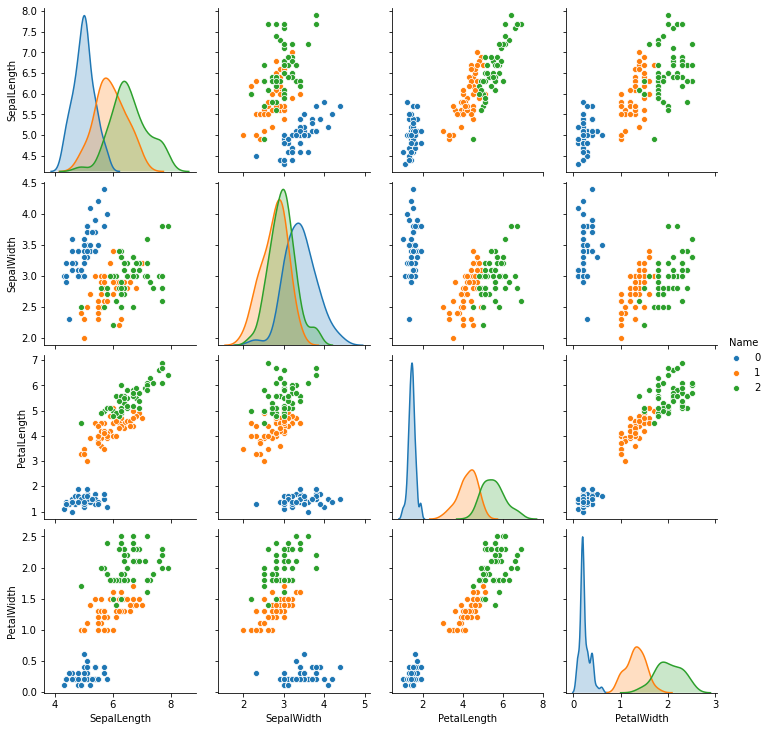

In [14]:
sns.pairplot(iris, hue='Name')

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [16]:
X_train.shape

(120, 4)

In [17]:
Y_train.shape

(120, 1)

In [18]:
X_test.shape

(30, 4)

In [19]:
Y_test.shape

(30, 1)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier(n_neighbors=3)
KN.fit(X_train, Y_train)

C:\Users\muhil\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [23]:
KN_dash = KN.predict(X_test)
KN_dash

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
confusion_matrix(Y_test,KN_dash)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [26]:
print(classification_report(Y_test,KN_dash))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

